# Heston simulation and distribution

## Time series simulation

In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from fyne import heston


rng=np.random.default_rng(42)

kappa = 5.07
theta = 0.0457
nu = 0.48
rho = -0.767
mu = 0.1

vol = theta
price = 1640

time_step = 1 / 252
time = 10

prices, vols, timestamps = heston.simulate(price, vol, mu, kappa, theta, nu, rho, time, time_step, rng)

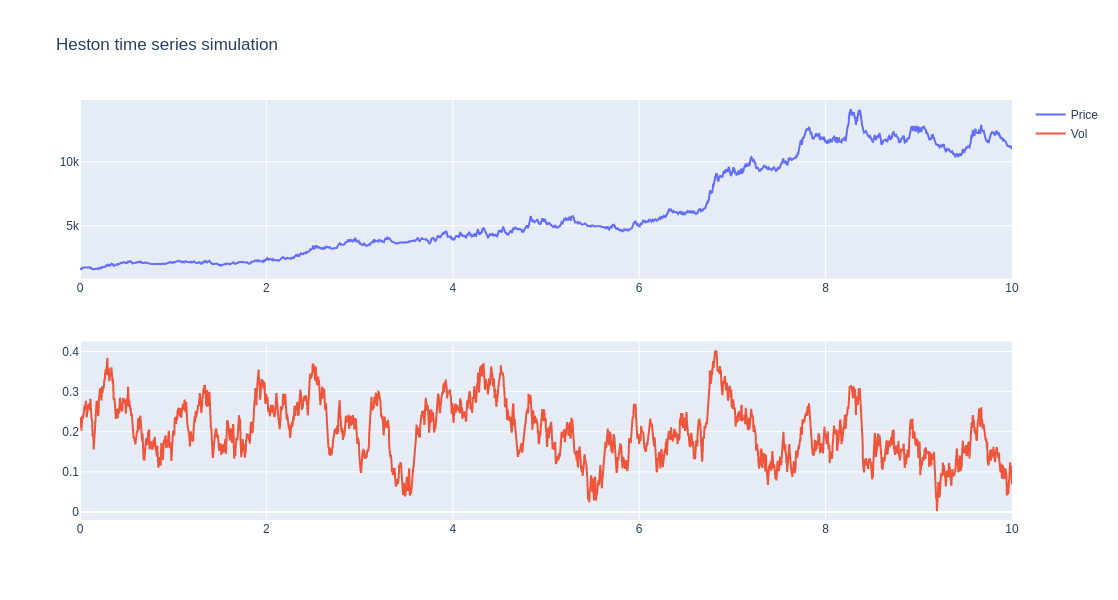

In [2]:
fig = make_subplots(cols=1, rows=2)
fig.add_trace(
    go.Scatter(
        x=timestamps,
        y=prices,
        name="Price",
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=timestamps,
        y=vols,
        name="Vol",
    ),
    row=2,
    col=1,
)
fig.update_layout(
    title="Heston time series simulation",
    height=600,
    width=800,
)
fig.show()

## Heston PDF

In [3]:
mc_samples = np.zeros(100_000)
time = 30 / 252
for i in range(len(mc_samples)):
    prices, _, _ = heston.simulate(price, vol, mu, kappa, theta, nu, rho, time, time_step, rng)
    mc_samples[i] = prices[-1]

price_grid = np.linspace(1300, 2500)
pdf_prices = [heston.pdf(x, price, time, vol, mu, kappa, theta, nu, rho) for x in price_grid]

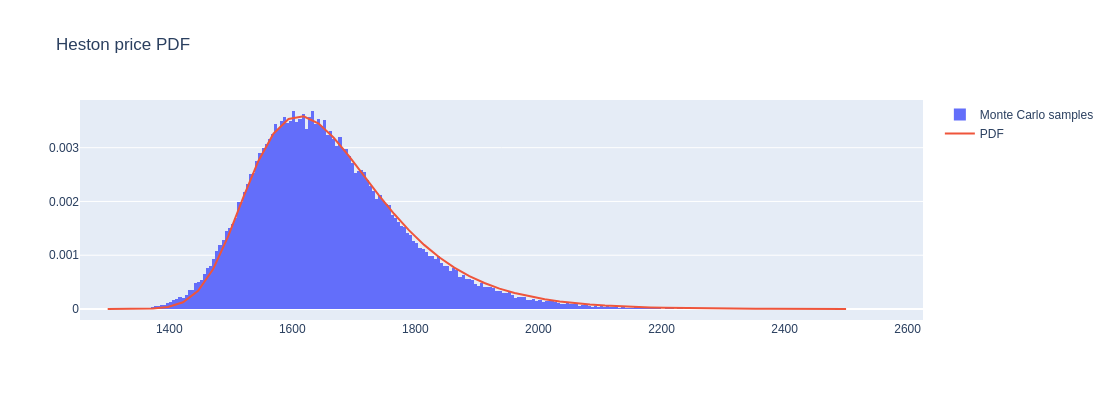

In [4]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(x=mc_samples, histnorm='probability density', name="Monte Carlo samples")
)
   
fig.add_trace(
    go.Scatter(
        x=price_grid,
        y=pdf_prices,
        name="PDF",
    )
)
fig.update_layout(
    title="Heston price PDF",
    height=400,
    width=800,
)
fig.show()